In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# Data Source

businv = pd.read_csv('BUSINV.csv')
businvdf = pd.DataFrame(businv)

ALTSALES = pd.read_csv('ALTSALES.csv')
ALTSALESdf = pd.DataFrame(ALTSALES)

businvdf

,DATE,BUSINV
0,2007-10-01,1466275
1,2007-11-01,1476711
2,2007-12-01,1488235
3,2008-01-01,1500273
4,2008-02-01,1507254
...,...,...
180,2022-10-01,2458874
181,2022-11-01,2466292
182,2022-12-01,2472058
183,2023-01-01,2466430


In [55]:
ALTSALESdf

,DATE,ALTSALES
0,2007-11-01,16.038
1,2007-12-01,15.718
2,2008-01-01,15.383
3,2008-02-01,15.166
4,2008-03-01,14.795
...,...,...
181,2022-12-01,13.374
182,2023-01-01,15.952
183,2023-02-01,14.921
184,2023-03-01,14.840


In [56]:
ALTSALESdf['ALTSALES'] = ALTSALESdf['ALTSALES'] * 100000
ALTSALESdf

,DATE,ALTSALES
0,2007-11-01,1603800.0
1,2007-12-01,1571800.0
2,2008-01-01,1538300.0
3,2008-02-01,1516600.0
4,2008-03-01,1479500.0
...,...,...
181,2022-12-01,1337400.0
182,2023-01-01,1595200.0
183,2023-02-01,1492100.0
184,2023-03-01,1484000.0


In [57]:
#Merged Auto and Business Inventories together on Date
output2 = pd.merge(businvdf, ALTSALESdf, 
                   on='DATE', 
                   how='left')
output2['DATE'] = pd.to_datetime(output2['DATE'])
output2.set_index('DATE', inplace=True)
output2 = output2.drop(output2.index[0])
output2.index = pd.to_datetime(output2.index)
output2

,BUSINV,ALTSALES
DATE,,
2007-11-01,1476711,1603800.0
2007-12-01,1488235,1571800.0
2008-01-01,1500273,1538300.0
2008-02-01,1507254,1516600.0
2008-03-01,1507954,1479500.0
...,...,...
2022-10-01,2458874,1528100.0
2022-11-01,2466292,1434100.0
2022-12-01,2472058,1337400.0


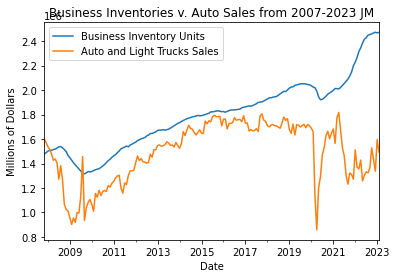

In [66]:
output2.plot(title='Business Inventories v. Auto Sales from 2007-2023 JM')
plt.legend(['Business Inventory Units', 'Auto and Light Trucks Sales'])
plt.xlabel('Date')
plt.ylabel('Millions of Dollars')
plt.show()

This line graph displays both Business Inventory Sales and Auto and Light Truck Sales from 2007-2023.

In [60]:
import pandas_bokeh
from bokeh.plotting import figure,output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import column

In [64]:
source = ColumnDataSource(data=output2)

fig_one = figure(x_axis_label="Year", y_axis_label="Millions of Dollars of Business Inventory", 
                 x_axis_type="datetime",
                 width = 500, height = 500)
fig_one.line(x="DATE", y="BUSINV", source=source, legend_label="Business Inventory Units")
fig_one.title = "Dollars Worth of Business Inventories from 2007-2023 JM" 
fig_one.legend.location = "top_left"

fig_two = figure(x_axis_label="Year", y_axis_label="Millions of Dollars", x_axis_type="datetime",
                 width = 500, height = 500)
fig_two.line(x='DATE', y='ALTSALES', source=source, color='Red', legend_label="Auto and Light Trucks Sales")
fig_two.title = "Dollars Worth of Auto and Light Truck Sales from 2007-2023 JM"
fig_two.legend.location = "top_left"

show(column(fig_one, fig_two))

A column display of line graphs for the two visuals of Business Inventory Units and Auto and Light Truck Sales sold from 2007-2023.

In [65]:
source = ColumnDataSource(data=output2)

fig=figure(x_axis_label="Year", y_axis_label="Millions of Dollars",
            x_axis_type="datetime")
fig.yaxis[0].formatter = NumeralTickFormatter(format="$0.0a")
fig.title = "Business Inventories v. Auto Sales from 2007-2023 JM"
fig.line(x="DATE", y="BUSINV", source=source, legend_label="Business Inventory Units")
fig.line(x='DATE', y='ALTSALES', source=source, color='Red', legend_label="Auto and Light Trucks Sales")
fig.legend.location = "top_left"
fig.legend.click_policy = "hide"
show(fig)

A bokeh line graph to enable observation of the relationship between business inventories and auto sales from 2007-2023. This version allows the user to toggle between which data they want to display on the line graph instead of the separate, column display. With both lines displayed, we can observe that:

The COVID-19 pandemic caused a dip in both inventory and sales in 2020, but auto sales initially surged due to demand for safe transportation; however, as the pandemic continues, auto sales have decreased below pre-COVID levels, while business inventory has increased.